from google.colab import drive
drive.mount('/content/drive',force_remount=True)


In [1]:
# rm -rf m5000

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd ..

/


In [4]:
!cp '/content/drive/MyDrive/m30000.zip' content

In [5]:
cd content

/content


In [6]:
!unzip m30000.zip -d m30000

Archive:  m30000.zip
   creating: m30000/Black chaff/
  inflating: m30000/Black chaff/008c03cb-b359-41f6-ace9-7dc6a950c2fb.jpg  
  inflating: m30000/Black chaff/00932f1c-88cc-4fd9-846f-5798a43b4e7b.jpg  
  inflating: m30000/Black chaff/01853289-bdf1-43bb-b795-707773cd33b9.jpg  
  inflating: m30000/Black chaff/03537c44-757b-4815-8bfd-4ffdbe2d1a31.jpg  
  inflating: m30000/Black chaff/039a07ca-7d5d-4f74-8606-f5501ba0cc3a.jpg  
  inflating: m30000/Black chaff/03be4ff1-a774-4f61-9c26-456be08d7e09.jpg  
  inflating: m30000/Black chaff/041cbcd5-4e28-4109-9966-b61520ffdc8f.jpg  
  inflating: m30000/Black chaff/046dd642-01ac-4687-9ac1-a8aa71119fd0.jpg  
  inflating: m30000/Black chaff/082981d4-0025-494d-adc9-d848ce9efe0c.jpg  
  inflating: m30000/Black chaff/0912b254-ee71-4bc6-a3b4-29d7ea072d78.jpg  
  inflating: m30000/Black chaff/091c405e-636a-4383-aef0-b1436e7af5e2.jpg  
  inflating: m30000/Black chaff/0d18125e-f07b-4164-9e41-73d3fac44353.jpg  
  inflating: m30000/Black chaff/0d1ea6ff-06ee-

In [7]:
import os

folder_path = "m30000/"  # Replace with your folder path

# List all files in the folder
file_list = os.listdir(folder_path)

# Get the number of files
num_files = len(file_list)

print("Number of files in the folder:", num_files)


Number of files in the folder: 8


In [8]:
import tensorflow as tf

directory="m30000"
dataset=tf.keras.utils.image_dataset_from_directory(
    directory,
    shuffle= True,
    batch_size=32,
    image_size=(256, 256),

)

Found 2826 files belonging to 8 classes.


In [9]:
class_names=dataset.class_names
class_names

['Black chaff',
 'Brown rust',
 'Crown and Root Rot',
 'Healthy Wheat',
 'Leaf Rust',
 'Powdery mildew',
 'Wheat Loose Smut',
 'Yellow rust']

In [10]:
def get_dataset_partition(ds, train_split=0.7, val_split=0.1, test_split=0.2, shuffle=True, shuffle_size=10000):



    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)  # Fixed variable name

    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size).take(int(test_split * ds_size))
    val_ds = ds.skip(train_size + int(test_split * ds_size)).take(val_size)

    return train_ds, test_ds, val_ds


In [11]:
train_ds, test_ds, val_ds=get_dataset_partition(dataset)

In [12]:
print(len(train_ds)*32,len(test_ds)*32,len(val_ds)*32)

1984 544 256


In [13]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, MobileNetV2
from tensorflow.keras import layers, Model

# ...

# Load the pre-trained MnasNetV2 model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the weights of the base model
base_model.trainable = False

# Rest of your code remains the same

# Add your custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Add dropout layer

# Modify the output layer for 8 classes
output = layers.Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=251
)

Epoch 1/251
62/62 [==============================] - 24s 122ms/step - loss: 1.8598 - accuracy: 0.3063 - val_loss: 1.5564 - val_accuracy: 0.5078
Epoch 2/251
62/62 [==============================] - 4s 57ms/step - loss: 1.5757 - accuracy: 0.4195 - val_loss: 1.3342 - val_accuracy: 0.5586
Epoch 3/251
62/62 [==============================] - 4s 58ms/step - loss: 1.4270 - accuracy: 0.4648 - val_loss: 1.2303 - val_accuracy: 0.5820
Epoch 4/251
62/62 [==============================] - 4s 57ms/step - loss: 1.3348 - accuracy: 0.5020 - val_loss: 1.1786 - val_accuracy: 0.6211
Epoch 5/251
62/62 [==============================] - 4s 58ms/step - loss: 1.2528 - accuracy: 0.5586 - val_loss: 1.0731 - val_accuracy: 0.6445
Epoch 6/251
62/62 [==============================] - 4s 61ms/step - loss: 1.2143 - accuracy: 0.5612 - val_loss: 1.0713 - val_accuracy: 0.6211
Epoch 7/251
62/62 [==============================] - 4s 57ms/step - loss: 1.1618 - accuracy: 0.5775 - val_loss: 1.0098 - val_accuracy: 0.6602
Epoc

In [19]:
tf.keras.backend.clear_session()
del train_ds
del val_ds

In [20]:
import gc
gc.collect()

4

In [21]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
scores=model.evaluate(test_ds)
scores

17/17 [==============================] - 4s 54ms/step - loss: 0.7096 - accuracy: 0.8805


[0.7096412777900696, 0.8805146813392639]

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
import matplotlib.pyplot as plt
import math

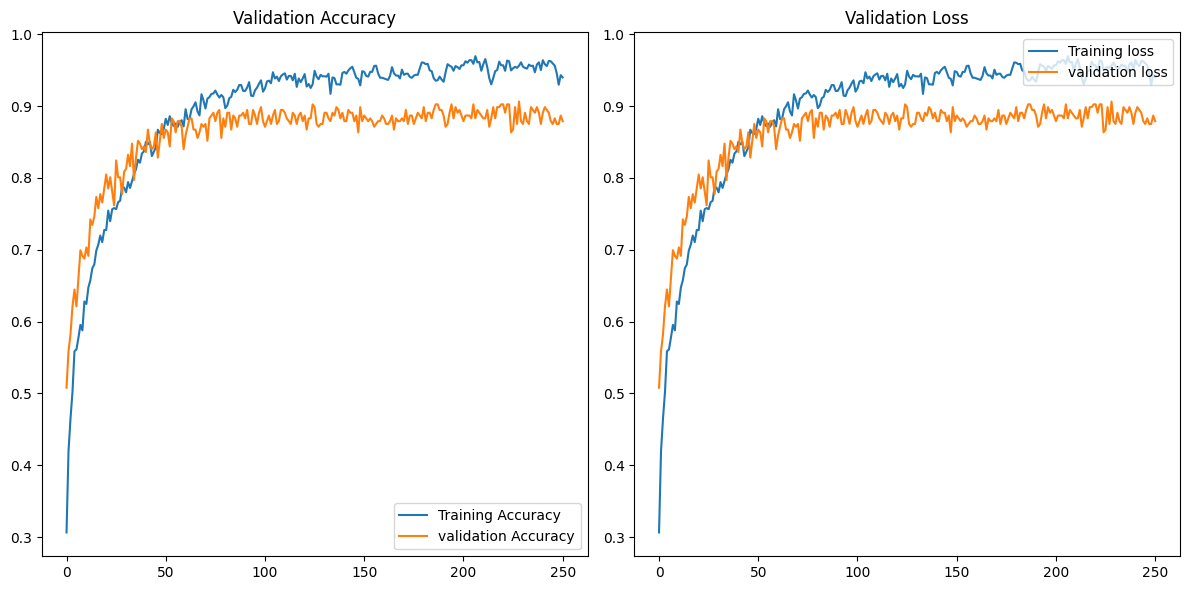

In [24]:
EPOCHS=251
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),acc,label='Training loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),val_acc,label='validation loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')



plt.tight_layout()
plt.show()

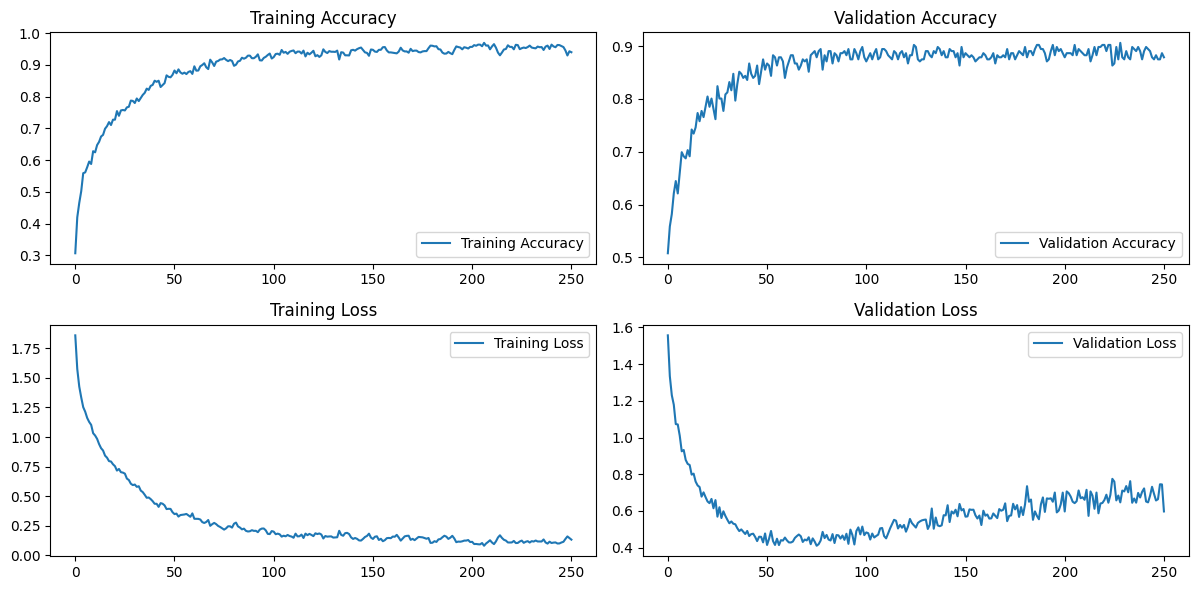

In [25]:
EPOCHS=251
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2,2,2)
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(2,2,3)
plt.plot(range(EPOCHS), loss, label='Training Loss')  # Changed to 'loss'
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(2,2,4)
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')  # Changed to 'val_loss'
plt.legend(loc='upper right')
plt.title('Validation Loss')

plt.tight_layout()
plt.show()


first image to predict
label:  Brown rust
1/1 [==============================] - 1s 779ms/step
predicted Label:  Brown rust


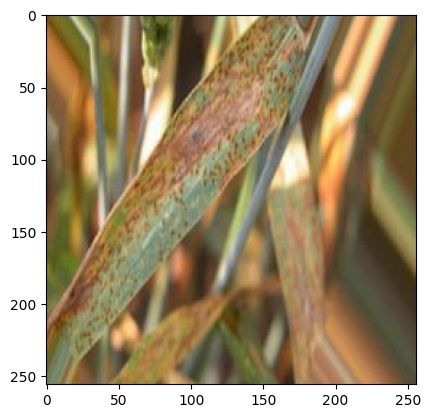

In [26]:
i=5
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image=images_batch[i].numpy().astype("uint8")

  print("first image to predict")
  plt.imshow(first_image)

  print("label: ", class_names[labels_batch[i].numpy()])
  batch_prediction=model.predict(images_batch)
  print("predicted Label: ",class_names[np.argmax(batch_prediction[i])])

In [27]:
def predict(model, img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)
  predicted_class= class_names[np.argmax(predictions[0])]
  confidence=round(100*np.max(predictions[0]),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 31ms/step


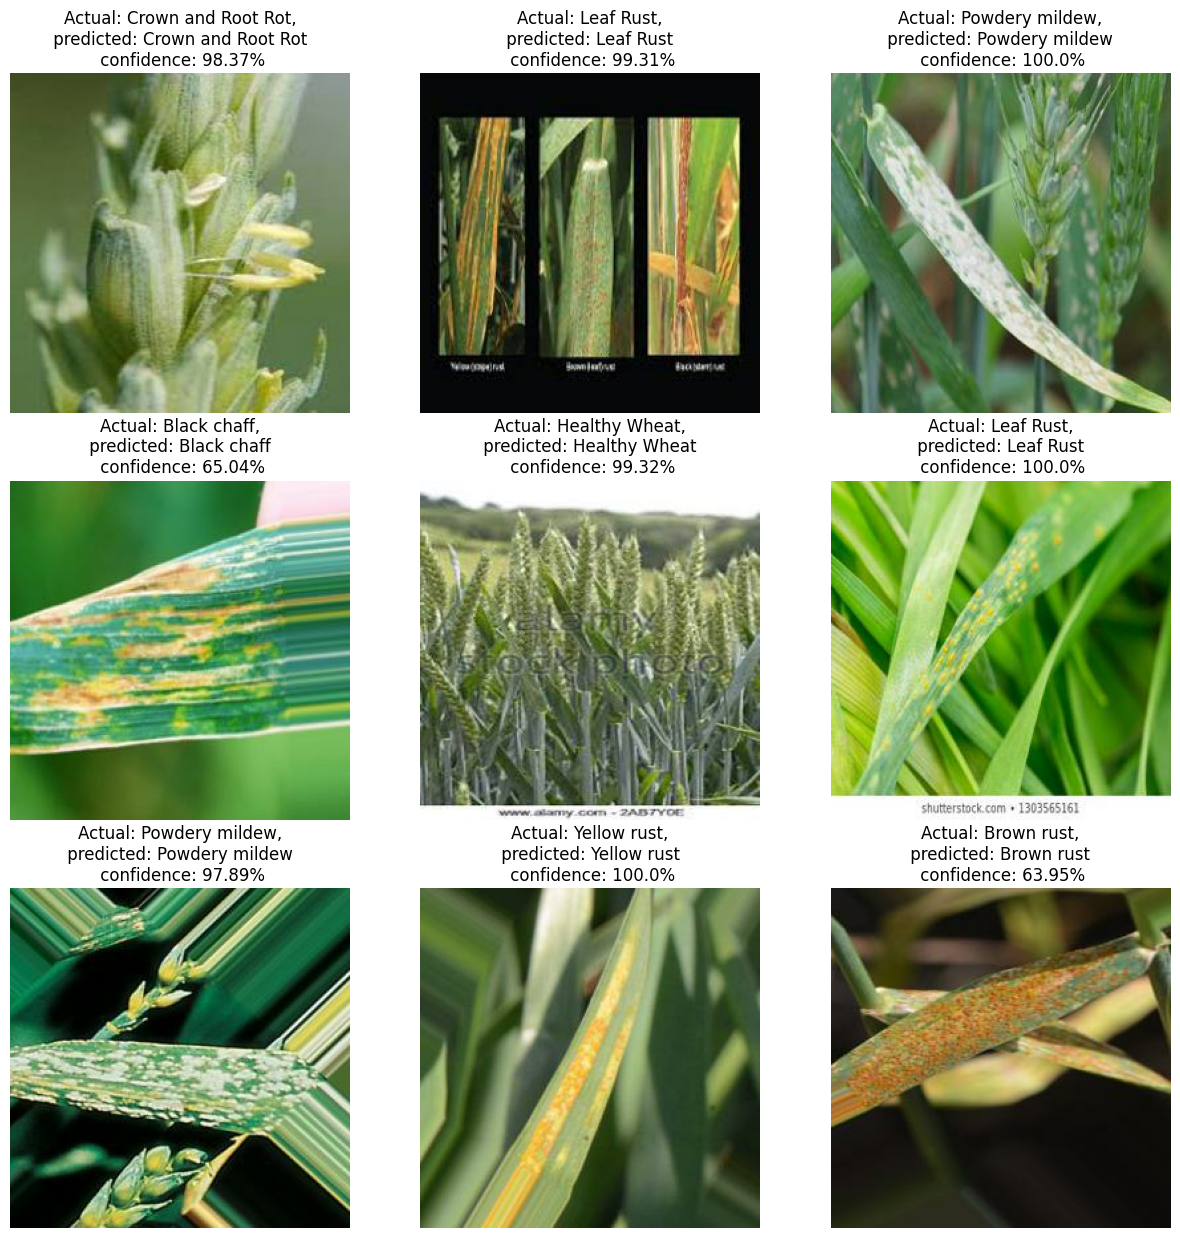

In [28]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):

  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())

    actual_class=class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n predicted: {predicted_class} \n confidence: {confidence}%")
    plt.axis("off")

In [29]:
model.save('mobilenetv2.h5')